## Dimensionality Reduction

https://towardsdatascience.com/dimensionality-reduction-pca-versus-autoencoders-338fcaf3297d

Dimensionality reduction is a technique to reduce the number of features in a machine learning model. There are two methods to reduce the dimensions:
1. Feature Selection  -> subset important features and remove collinear or not-so-important features
2. Feature Extraction/Transformation -> tries to project the high-dimensional data into lower dimensions
    - PCA, Matrix-Factorisation, Autoencoders, t-Sne, UMAP, etc.
    
### PCA
- unsupervised learning algorithm
- original data is projected to the direction of high variance
- projections are orthogonal -> correlation very close to 0
- linear
- for small datasets

### Autoencoders
- unsupervised artificial neural network
- bases on Encoder-Decoder architecture
- compresses the data to lower dimension (focusing on important features / and getting rid of noise and redundancy)
- linear and non-linear
- features can be correlated after transformation 
- for larger datasets 

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
#PIL is Python Imaging Library
from PIL import Image
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import random
# library of Python bindings designed to solve computer vision problems
import cv2 
%matplotlib inline
%config IndlineBackend.figure_format='retina'

In [2]:
# load image
# the image needs to be a pgm file picture based on 2d
img = Image.open('test_bild.pgm')

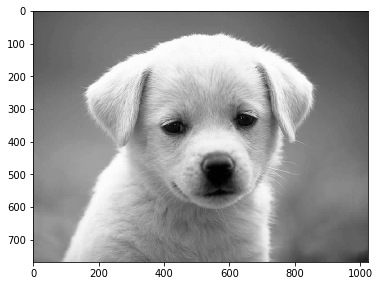

In [3]:
plt.figure(figsize=(6,6))
# graysacle picture so we need to specify cmap
plt.imshow(img, cmap = plt.cm.gray);

In [4]:
# we can think of the hight as the datapoints and the width as the
# features
img.height, img.width

(768, 1024)

In [5]:
image_matrix = np.array(img)
image_matrix.shape

(768, 1024)

In [6]:
original_dimensions = image_matrix.shape
image_matrix.shape

(768, 1024)

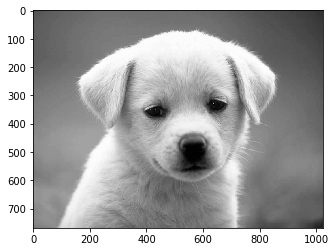

In [7]:
# rconstrcuted picture from array
recon_image = Image.fromarray(image_matrix)
plt.imshow(recon_image, cmap = plt.cm.gray)

### PCA

In [61]:
# reduce dimension to 10%
pct_reduction = 0.10
reduced_pixel = int(pct_reduction*original_dimensions[1])

In [62]:
reduced_pixel

102

In [10]:
pca = PCA(n_components=reduced_pixel)
pca.fit(image_matrix)

PCA(copy=True, iterated_power='auto', n_components=102, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
X_transformed = pca.transform(image_matrix)

In [12]:
# we have successfully reduced the dimensions to 10%
X_transformed.shape

(768, 102)

In [13]:
# create DataFrame to check corrleation
df_pca = pd.DataFrame(data = X_transformed,
                     columns= list(range(X_transformed.shape[1])))

In [14]:
df_pca

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,-617.522502,1388.721073,-383.266116,649.277234,-59.521939,-138.625323,246.464324,40.296805,-147.138035,23.479929,...,2.134407,2.017982,4.717352,2.445839,1.117452,-1.260162,1.606260,-0.974580,-2.590187,0.652746
1,-617.653618,1388.420299,-383.444617,648.583737,-59.077890,-138.987513,246.148988,40.060878,-147.053050,23.544652,...,2.063984,1.863440,4.659505,1.944410,1.199770,-1.045274,1.522615,-1.056760,-2.499948,0.744081
2,-617.519643,1388.216311,-383.726051,648.544732,-58.474106,-139.032870,246.579308,40.049589,-147.005980,23.137702,...,2.066159,1.946980,4.941971,2.004820,1.245761,-1.298048,1.602484,-1.214224,-2.744058,0.488318
3,-617.638530,1388.108006,-383.646655,648.320305,-58.520445,-138.823648,246.337400,40.136129,-147.097653,23.112930,...,2.133533,1.803864,4.821070,2.000006,1.198707,-1.222581,1.753730,-1.296463,-2.831603,0.354743
4,-617.837074,1387.418605,-383.993689,647.244491,-57.474021,-138.767328,246.028791,40.035654,-147.004731,22.825857,...,2.199700,1.666582,4.948919,1.531448,1.309058,-1.135298,1.893556,-1.601496,-2.959623,0.121301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,-845.033673,710.294864,-298.111218,-364.165040,-51.092478,-120.608874,-76.386863,445.844292,107.745335,33.272630,...,-8.747841,10.751917,-7.067471,3.241547,4.339469,8.876733,2.392757,8.710151,-3.475143,-0.058639
764,-845.958208,726.138393,-300.531399,-348.517804,-47.878062,-121.874690,-70.648067,448.957922,104.205711,35.366989,...,-12.197661,13.177567,-12.655354,-0.848130,3.377890,4.185235,-2.409087,-0.596659,-6.027621,10.840640
765,-849.218485,743.230859,-301.725288,-335.239728,-43.399970,-123.874330,-70.506631,447.757096,95.556157,34.832770,...,-12.037869,12.407641,-17.685139,-3.359631,1.946412,-1.433741,-6.639862,-3.863811,-9.901813,14.530628
766,-852.014167,762.315082,-300.599699,-325.334713,-40.118837,-129.010068,-80.042109,440.186673,82.232187,33.525623,...,-7.452544,6.904777,-21.132972,-3.469138,-0.380364,-4.099470,-8.019233,1.757322,-14.748598,10.279106


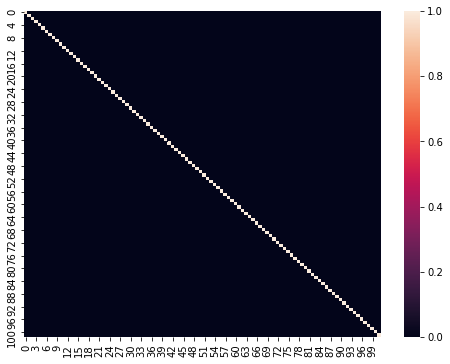

In [15]:
figure = plt.figure(figsize=(8,6))
corrMatrix = df_pca.corr()
sns.heatmap(corrMatrix, annot=False)

As expected one of the crated dimensions is correlated to the other one. This shows that dimensions are created from the orthogonal.

In [16]:
# reverse transfomre X_transform
recon_matrix = pca.inverse_transform(X_transformed)

In [17]:
# now we have the original shape
recon_matrix.shape

(768, 1024)

In [18]:
# np.uint8: define int range (0 to 255)
recon_img_pca = Image.fromarray(np.uint8(recon_matrix))

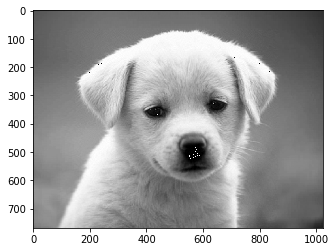

In [19]:
plt.imshow(recon_img_pca,cmap = plt.cm.gray)

In [23]:
image_matrix.shape, recon_matrix.shape

((768, 1024), (768, 1024))

In [47]:
# claculate root-mean-square error (rmse)
def rmse(predictions, targets):
    return np.sqrt(np.mean((predictions-targets)**2))

In [48]:
error_pca = rmse(recon_matrix, image_matrix)

In [49]:
# really low RMSE (lower the better) 0 would be the best-100% accuracy
error_pca

1.738986101090266

### Autoencoders

In [50]:
# scale the image matrix to use in the neural network
X_org = image_matrix.copy()
sc = StandardScaler()
X = sc.fit_transform(X_org)

In [60]:
from keras.layers import Input, Dense
from keras.models import Model

In [63]:
# this is the size of our encoded representations
encoding_dim = reduced_pixel

In [66]:
# instantiare a Keras tensor
input_img = Input(shape=(img.width,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='linear')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(img.width, activation=None)(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [70]:
# Encoder
encoder = Model(input_img, encoded)

# create a placeholder for an encoded input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [71]:
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [72]:
autoencoder.fit(X, X, epochs=500, batch_size=16, shuffle=True)

Epoch 1/500
768/768 [==============================] - 0s 278us/step - loss: 1.2938
Epoch 2/500
768/768 [==============================] - 0s 176us/step - loss: 1.2791
Epoch 3/500
768/768 [==============================] - 0s 213us/step - loss: 1.2648
Epoch 4/500
768/768 [==============================] - 0s 206us/step - loss: 1.2509
Epoch 5/500
768/768 [==============================] - 0s 165us/step - loss: 1.2375
Epoch 6/500
768/768 [==============================] - 0s 210us/step - loss: 1.2245
Epoch 7/500
768/768 [==============================] - 0s 278us/step - loss: 1.2120
Epoch 8/500
768/768 [==============================] - 0s 168us/step - loss: 1.2000
Epoch 9/500
768/768 [==============================] - 0s 180us/step - loss: 1.1883
Epoch 10/500
768/768 [==============================] - 0s 179us/step - loss: 1.1770
Epoch 11/500
768/768 [==============================] - 0s 175us/step - loss: 1.1661
Epoch 12/500
768/768 [==============================] - 0s 194us/step - lo

768/768 [==============================] - 0s 178us/step - loss: 0.7281
Epoch 98/500
768/768 [==============================] - 0s 155us/step - loss: 0.7239
Epoch 99/500
768/768 [==============================] - 0s 153us/step - loss: 0.7198
Epoch 100/500
768/768 [==============================] - 0s 152us/step - loss: 0.7156
Epoch 101/500
768/768 [==============================] - 0s 162us/step - loss: 0.7114
Epoch 102/500
768/768 [==============================] - 0s 164us/step - loss: 0.7072
Epoch 103/500
768/768 [==============================] - 0s 154us/step - loss: 0.7031
Epoch 104/500
768/768 [==============================] - 0s 168us/step - loss: 0.6989
Epoch 105/500
768/768 [==============================] - 0s 158us/step - loss: 0.6948
Epoch 106/500
768/768 [==============================] - 0s 158us/step - loss: 0.6907
Epoch 107/500
768/768 [==============================] - 0s 239us/step - loss: 0.6865
Epoch 108/500
768/768 [==============================] - 0s 227us/step

768/768 [==============================] - 0s 158us/step - loss: 0.4198
Epoch 193/500
768/768 [==============================] - 0s 149us/step - loss: 0.4178
Epoch 194/500
768/768 [==============================] - 0s 149us/step - loss: 0.4158
Epoch 195/500
768/768 [==============================] - 0s 150us/step - loss: 0.4139
Epoch 196/500
768/768 [==============================] - 0s 155us/step - loss: 0.4120
Epoch 197/500
768/768 [==============================] - 0s 153us/step - loss: 0.4101
Epoch 198/500
768/768 [==============================] - 0s 152us/step - loss: 0.4082
Epoch 199/500
768/768 [==============================] - 0s 149us/step - loss: 0.4064
Epoch 200/500
768/768 [==============================] - 0s 149us/step - loss: 0.4046
Epoch 201/500
768/768 [==============================] - 0s 154us/step - loss: 0.4029
Epoch 202/500
768/768 [==============================] - 0s 150us/step - loss: 0.4011
Epoch 203/500
768/768 [==============================] - 0s 150us/st

768/768 [==============================] - 0s 189us/step - loss: 0.3096
Epoch 288/500
768/768 [==============================] - 0s 151us/step - loss: 0.3090
Epoch 289/500
768/768 [==============================] - 0s 161us/step - loss: 0.3084
Epoch 290/500
768/768 [==============================] - 0s 155us/step - loss: 0.3077
Epoch 291/500
768/768 [==============================] - 0s 153us/step - loss: 0.3071
Epoch 292/500
768/768 [==============================] - 0s 161us/step - loss: 0.3065
Epoch 293/500
768/768 [==============================] - 0s 153us/step - loss: 0.3059
Epoch 294/500
768/768 [==============================] - 0s 152us/step - loss: 0.3053
Epoch 295/500
768/768 [==============================] - 0s 154us/step - loss: 0.3047
Epoch 296/500
768/768 [==============================] - 0s 152us/step - loss: 0.3042
Epoch 297/500
768/768 [==============================] - 0s 153us/step - loss: 0.3036
Epoch 298/500
768/768 [==============================] - 0s 147us/st

768/768 [==============================] - 0s 170us/step - loss: 0.2641
Epoch 383/500
768/768 [==============================] - 0s 151us/step - loss: 0.2637
Epoch 384/500
768/768 [==============================] - 0s 150us/step - loss: 0.2633
Epoch 385/500
768/768 [==============================] - 0s 150us/step - loss: 0.2629
Epoch 386/500
768/768 [==============================] - 0s 151us/step - loss: 0.2625
Epoch 387/500
768/768 [==============================] - 0s 150us/step - loss: 0.2621
Epoch 388/500
768/768 [==============================] - 0s 151us/step - loss: 0.2617
Epoch 389/500
768/768 [==============================] - 0s 152us/step - loss: 0.2613
Epoch 390/500
768/768 [==============================] - 0s 151us/step - loss: 0.2609
Epoch 391/500
768/768 [==============================] - 0s 150us/step - loss: 0.2605
Epoch 392/500
768/768 [==============================] - 0s 161us/step - loss: 0.2601
Epoch 393/500
768/768 [==============================] - 0s 162us/st

768/768 [==============================] - 0s 152us/step - loss: 0.2282
Epoch 478/500
768/768 [==============================] - 0s 148us/step - loss: 0.2279
Epoch 479/500
768/768 [==============================] - 0s 149us/step - loss: 0.2275
Epoch 480/500
768/768 [==============================] - 0s 148us/step - loss: 0.2272
Epoch 481/500
768/768 [==============================] - 0s 152us/step - loss: 0.2268
Epoch 482/500
768/768 [==============================] - 0s 151us/step - loss: 0.2265
Epoch 483/500
768/768 [==============================] - 0s 150us/step - loss: 0.2261
Epoch 484/500
768/768 [==============================] - 0s 150us/step - loss: 0.2257
Epoch 485/500
768/768 [==============================] - 0s 151us/step - loss: 0.2254
Epoch 486/500
768/768 [==============================] - 0s 153us/step - loss: 0.2250
Epoch 487/500
768/768 [==============================] - 0s 147us/step - loss: 0.2247
Epoch 488/500
768/768 [==============================] - 0s 151us/st

In [73]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 102)               104550    
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              105472    
Total params: 210,022
Trainable params: 210,022
Non-trainable params: 0
_________________________________________________________________


In [74]:
res = autoencoder.predict(X)

In [79]:
encoded_imgs = encoder.predict(X)
decoded_imgs = decoder.predict(encoded_imgs)

In [80]:
# create DataFrame
df_ae = pd.DataFrame(data = encoded_imgs,
                    columns = list(range(encoded_imgs.shape[1])))

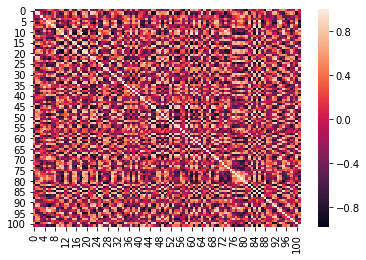

In [83]:
corrMatrix = df_ae.corr()
sns.heatmap(corrMatrix, annot=False)

As expected there are some correlations between the features. The reason is that AE training is to merely minimize the reconstruction loss.

In [84]:
# reconstruct the picture
# first inverse standardization
X_decoded_ae = sc.inverse_transform(decoded_imgs)

In [85]:
recon_img_ae = Image.fromarray(np.uint8(X_decoded_ae))

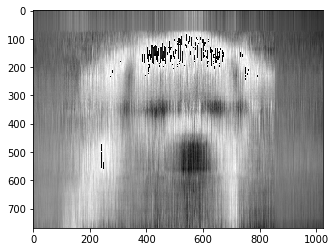

In [87]:
plt.imshow(recon_img_ae, cmap = plt.cm.gray);

In [88]:
error_ae = rmse(X_decoded_ae, image_matrix)
error_ae

21.53187

When comparing the pictures and the score it is clear that a single layer with linear activation performs worse than a simple PCA. Lets try a three layer with non-linear activation:

#### Autoencoders (three layer, non-linear)

In [94]:
input_img = Input(shape=(img.width,))

encoded1 = Dense(276, activation='relu')(input_img)
encoded2 = Dense(reduced_pixel, activation='relu')(encoded1)

decoded1 = Dense(276, activation='relu')(encoded2)
decoded2 = Dense(img.width, activation=None)(decoded1)

In [95]:
autoencoder = Model(input_img, decoded2)
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [96]:
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 276)               282900    
_________________________________________________________________
dense_12 (Dense)             (None, 102)               28254     
_________________________________________________________________
dense_13 (Dense)             (None, 276)               28428     
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              283648    
Total params: 623,230
Trainable params: 623,230
Non-trainable params: 0
_________________________________________________________________


In [97]:
autoencoder.fit(X, X, epochs=500, batch_size=16, shuffle=True)

Epoch 1/500
768/768 [==============================] - 0s 420us/step - loss: 1.0478
Epoch 2/500
768/768 [==============================] - 0s 392us/step - loss: 1.0451
Epoch 3/500
768/768 [==============================] - 0s 360us/step - loss: 1.0425
Epoch 4/500
768/768 [==============================] - 0s 337us/step - loss: 1.0401
Epoch 5/500
768/768 [==============================] - 0s 341us/step - loss: 1.0377
Epoch 6/500
768/768 [==============================] - 0s 347us/step - loss: 1.0355
Epoch 7/500
768/768 [==============================] - 0s 340us/step - loss: 1.0334
Epoch 8/500
768/768 [==============================] - 0s 340us/step - loss: 1.0314
Epoch 9/500
768/768 [==============================] - 0s 340us/step - loss: 1.0295
Epoch 10/500
768/768 [==============================] - 0s 368us/step - loss: 1.0276
Epoch 11/500
768/768 [==============================] - 0s 375us/step - loss: 1.0258
Epoch 12/500
768/768 [==============================] - 0s 497us/step - lo

768/768 [==============================] - 0s 335us/step - loss: 0.9518
Epoch 98/500
768/768 [==============================] - 0s 322us/step - loss: 0.9509
Epoch 99/500
768/768 [==============================] - 0s 319us/step - loss: 0.9501
Epoch 100/500
768/768 [==============================] - 0s 317us/step - loss: 0.9492
Epoch 101/500
768/768 [==============================] - 0s 314us/step - loss: 0.9482
Epoch 102/500
768/768 [==============================] - 0s 311us/step - loss: 0.9473
Epoch 103/500
768/768 [==============================] - 0s 308us/step - loss: 0.9464
Epoch 104/500
768/768 [==============================] - 0s 307us/step - loss: 0.9455
Epoch 105/500
768/768 [==============================] - 0s 309us/step - loss: 0.9445
Epoch 106/500
768/768 [==============================] - 0s 326us/step - loss: 0.9436
Epoch 107/500
768/768 [==============================] - 0s 316us/step - loss: 0.9426
Epoch 108/500
768/768 [==============================] - 0s 310us/step

768/768 [==============================] - 0s 340us/step - loss: 0.8068
Epoch 193/500
768/768 [==============================] - 0s 328us/step - loss: 0.8045
Epoch 194/500
768/768 [==============================] - 0s 317us/step - loss: 0.8023
Epoch 195/500
768/768 [==============================] - 0s 334us/step - loss: 0.8000
Epoch 196/500
768/768 [==============================] - 0s 330us/step - loss: 0.7977
Epoch 197/500
768/768 [==============================] - 0s 327us/step - loss: 0.7954
Epoch 198/500
768/768 [==============================] - 0s 421us/step - loss: 0.7931
Epoch 199/500
768/768 [==============================] - 0s 320us/step - loss: 0.7908
Epoch 200/500
768/768 [==============================] - 0s 315us/step - loss: 0.7885
Epoch 201/500
768/768 [==============================] - 0s 352us/step - loss: 0.7862
Epoch 202/500
768/768 [==============================] - 0s 466us/step - loss: 0.7838
Epoch 203/500
768/768 [==============================] - 0s 372us/st

768/768 [==============================] - 0s 326us/step - loss: 0.5755
Epoch 288/500
768/768 [==============================] - 0s 381us/step - loss: 0.5732
Epoch 289/500
768/768 [==============================] - 0s 345us/step - loss: 0.5709
Epoch 290/500
768/768 [==============================] - 0s 324us/step - loss: 0.5687
Epoch 291/500
768/768 [==============================] - 0s 324us/step - loss: 0.5664
Epoch 292/500
768/768 [==============================] - 0s 351us/step - loss: 0.5642
Epoch 293/500
768/768 [==============================] - 0s 322us/step - loss: 0.5620
Epoch 294/500
768/768 [==============================] - 0s 325us/step - loss: 0.5598
Epoch 295/500
768/768 [==============================] - 0s 317us/step - loss: 0.5575
Epoch 296/500
768/768 [==============================] - 0s 320us/step - loss: 0.5553
Epoch 297/500
768/768 [==============================] - 0s 319us/step - loss: 0.5531
Epoch 298/500
768/768 [==============================] - 0s 319us/st

768/768 [==============================] - 0s 365us/step - loss: 0.4075
Epoch 383/500
768/768 [==============================] - 0s 345us/step - loss: 0.4063
Epoch 384/500
768/768 [==============================] - 0s 322us/step - loss: 0.4050
Epoch 385/500
768/768 [==============================] - 0s 336us/step - loss: 0.4038
Epoch 386/500
768/768 [==============================] - 0s 327us/step - loss: 0.4027
Epoch 387/500
768/768 [==============================] - 0s 335us/step - loss: 0.4015
Epoch 388/500
768/768 [==============================] - 0s 324us/step - loss: 0.4003
Epoch 389/500
768/768 [==============================] - 0s 329us/step - loss: 0.3992
Epoch 390/500
768/768 [==============================] - 0s 345us/step - loss: 0.3980
Epoch 391/500
768/768 [==============================] - 0s 336us/step - loss: 0.3969
Epoch 392/500
768/768 [==============================] - 0s 328us/step - loss: 0.3958
Epoch 393/500
768/768 [==============================] - 0s 326us/st

768/768 [==============================] - 0s 326us/step - loss: 0.3282
Epoch 478/500
768/768 [==============================] - 0s 321us/step - loss: 0.3276
Epoch 479/500
768/768 [==============================] - 0s 321us/step - loss: 0.3271
Epoch 480/500
768/768 [==============================] - 0s 316us/step - loss: 0.3265
Epoch 481/500
768/768 [==============================] - 0s 318us/step - loss: 0.3260
Epoch 482/500
768/768 [==============================] - 0s 319us/step - loss: 0.3254
Epoch 483/500
768/768 [==============================] - 0s 314us/step - loss: 0.3249
Epoch 484/500
768/768 [==============================] - 0s 322us/step - loss: 0.3243
Epoch 485/500
768/768 [==============================] - 0s 317us/step - loss: 0.3238
Epoch 486/500
768/768 [==============================] - 0s 318us/step - loss: 0.3233
Epoch 487/500
768/768 [==============================] - 0s 322us/step - loss: 0.3228
Epoch 488/500
768/768 [==============================] - 0s 318us/st

In [98]:
# encoder
encoder = Model(input_img, encoded2)
# decoder
decoder = Model(input_img, decoded2)

In [99]:
encoded_imgs = encoder.predict(X)
decoded_imgs = decoder.predict(X)

In [103]:
# inverse standardization
X_decoded_deep_ae = sc.inverse_transform(decoded_imgs)

In [104]:
recon_img_deep_ae = Image.fromarray(np.uint8(X_decoded_deep_ae))

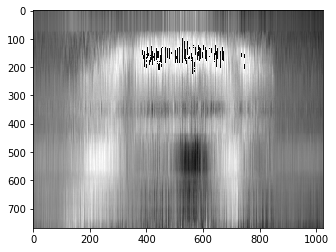

In [105]:
plt.imshow(recon_img_deep_ae, cmap = plt.cm.gray)

In [109]:
error_dae = rmse(X_decoded_deep_ae, image_matrix)
error_dae

26.441872

it even got worse with this picture. Normally there should be an decrease in error. The worse score is probably due to the fact that the picture is really simple and an Autoencoder with an extra layer with non_linear activation is able to capture complex patterns and sudden changes in pixel values better than PCA.

### Test dimensionality reduction on various pictures

In [132]:
def pca_pipeline(picture, percent_reduction):
    '''
    Input
        picture: filepath to picture (str)
        percent_reduction: percent of reduction (float: 0.10)
        
    
    
    
    '''    
    # load picture
    img = Image.open(picture)
    
    # show original picture
    print('original picture')
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap = plt.cm.gray)
    plt.show()
    
    # transform image to numpy array
    image_matrix = np.array(img)
    
    # get dimensions of picture
    orifinal_dimensions = image_matrix.shape
    
    # claculate dimension reduction
    pct_reduction = percent_reduction
    reduced_pixel  = int(pct_reduction* original_dimensions[1])
    
    # applying PCA
    pca = PCA(n_components=reduced_pixel)
    pca.fit(image_matrix)
    X_transformed = pca.transform(image_matrix)
    
    # reconstruct image
    recon_matrix = pca.inverse_transform(X_transformed)
    
    # create picture 
    recon_img_pca = Image.fromarray(np.uint8(recon_matrix))
    
    # plot picture
    print('pricture created from pca')
    plt.figure(figsize=(6,6))
    plt.imshow(recon_img_pca, cmap = plt.cm.gray)
    plt.show()
    
    # calculate rmse
    error = np.sqrt(np.mean((recon_matrix-image_matrix)**2))

    print(f'RMSE: {error}')

In [133]:
file = 'casablanca.pgm'

original picture


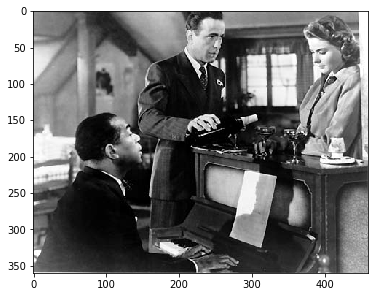

pricture created from pca


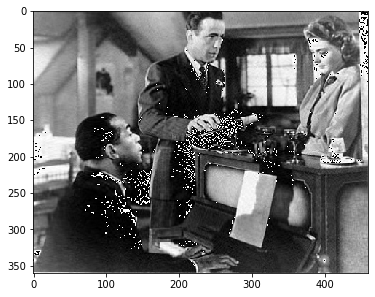

RMSE: 5.334449530839533


In [134]:
pca_pipeline(file, 0.10)